## Loading the Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme 
sns.set()

# Processing the data
df = pd.read_csv("palmer_penguins.csv")
df = df.dropna()

# Creating feature matrix and target vector
X = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()
y = df.species.to_numpy()

In [2]:
A = X - X.mean(axis = 0)

U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")

np.shape(U) = (333, 4)
np.shape(sigma) = (4,)
np.shape(Vt) = (4, 4) 



In [3]:
sigma_mat = np.diag(sigma)
print(f"A == U * sigma_mat * Vt: {np.allclose(A, np.dot(U, np.dot(sigma_mat, Vt)))} \n")

A == U * sigma_mat * Vt: True 



In [4]:
PC1 = Vt.T[:, 0]
PC2 = Vt.T[:, 1]
PC3 = Vt.T[:, 2]
PC4 = Vt.T[:, 3]

W2 = Vt.T[:, :2]
X2D = A.dot(W2)

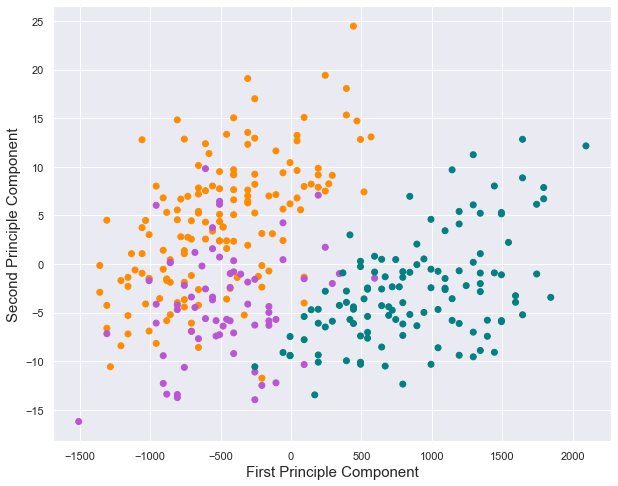

In [17]:
def colors(y):
    if y == "Gentoo":
        return "teal"
    elif y == "Adelie":
        return "darkorange"
    else:
        return "mediumorchid"

c = [colors(label) for label in y]

# Plotting PC1 vs. PC2
plt.figure(figsize = (10, 8))
plt.scatter(X2D[:, 0], X2D[:, 1], c = c)
plt.xlabel("First Principle Component", fontsize = 15)
plt.ylabel("Second Principle Component",fontsize = 15)
plt.show()

In [6]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)

print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.68633893 0.19452929 0.09216063 0.02697115]
per_var = [68.63 19.45  9.22  2.7 ] 



The first two principal components exaplain 68.63 + 19.45 = 88.08% of the variation in the data.

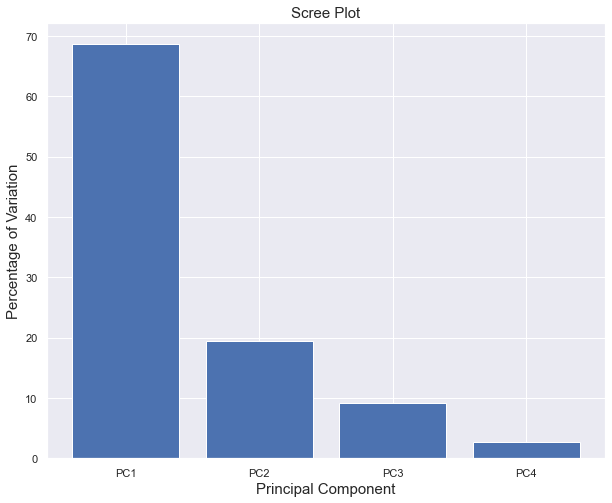

In [7]:
# Create a bar chart for the above array
# This chart is called a "Scree Plot"

labels = [f"PC{i}" for i in range(1,5)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 5), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

In [25]:
# we call function pca.components_ to see how each PC is obtained
# as a linear combination of the original coordinates

# for example, here PC1 = 0.453 * bill_length + 0.600 * bill_depth + 0.642 * flipper_length + 0.145 * body_mass

features = list(set(df.columns) - {"species",'island','sex','Unnamed: 0'})
pd.DataFrame(data = pca.components_, columns = labels, index = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"])

,PC1,PC2,PC3,PC4
bill_length_mm,0.453753,-0.399047,0.576825,0.549675
bill_depth_mm,0.600195,0.796170,0.005788,0.076464
flipper_length_mm,0.642495,-0.425800,-0.236095,-0.591737
body_mass_g,0.145170,-0.159904,-0.781984,0.584686


In [23]:
# we use pca.transform to see how our data looks like in the new coordinate system
# this will be used later to plot our data in the first two coordinates PC1, PC2

pca_data = pca.transform(scaled_X)
pca_df = pd.DataFrame(pca_data, columns = labels)

pca_df.head()

,PC1,PC2,PC3,PC4
0,-1.853593,0.032069,-0.234902,0.528397
1,-1.316254,-0.443527,-0.027470,0.401727
2,-1.376605,-0.161230,0.189689,-0.528662
3,-1.885288,-0.012351,-0.628873,-0.472893
4,-1.919981,0.817598,-0.701051,-0.196416


In [24]:
# we add to the previous table the labels for each penguin
pca_df['species'] = y 
pca_df["color"] = c

pca_df.head()

,PC1,PC2,PC3,PC4,species,color
0,-1.853593,0.032069,-0.234902,0.528397,Adelie,darkorange
1,-1.316254,-0.443527,-0.027470,0.401727,Adelie,darkorange
2,-1.376605,-0.161230,0.189689,-0.528662,Adelie,darkorange
3,-1.885288,-0.012351,-0.628873,-0.472893,Adelie,darkorange
4,-1.919981,0.817598,-0.701051,-0.196416,Adelie,darkorange


## Visualizing the Effect of PCA

Plotting one principal component (especially the first few) against another allows us to see its power.

### PC1 vs. PC2

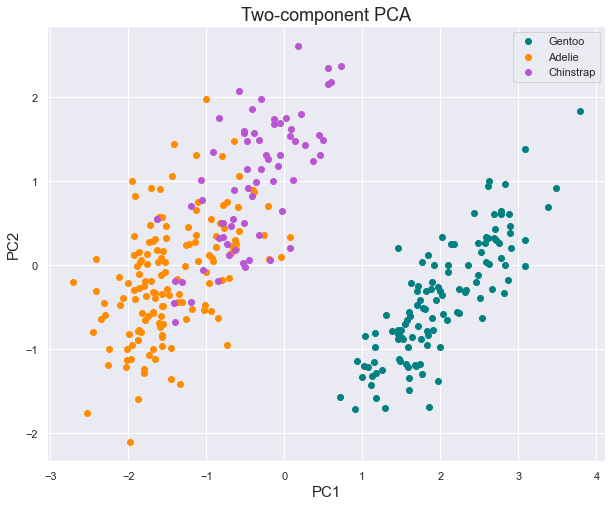

In [13]:
targets = ["Gentoo", "Adelie", "Chinstrap"]
colors = ["teal", "darkorange", "mediumorchid"]

plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df = pca_df[pca_df['species'] == target]
    plt.scatter(temp_df["PC1"],
                temp_df["PC2"],
                c = color)
    
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('Two-component PCA', fontsize = 18)
plt.legend(targets)
plt.show()

With this plot we can easily seperate out the Gentoo data from either the Adelie data or the Chinstrap data.

### PC1 vs. PC3

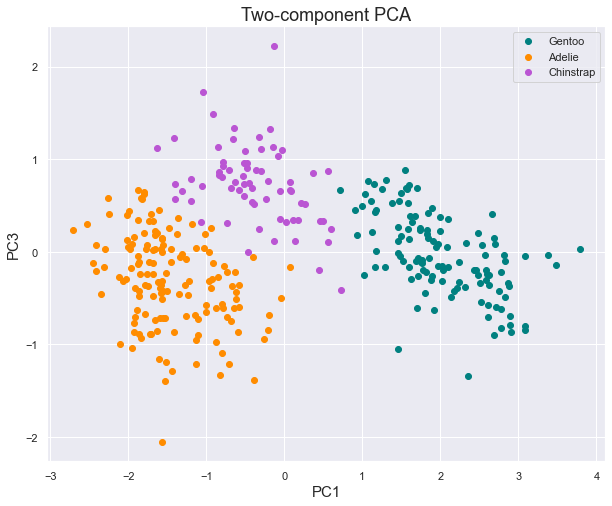

In [14]:
plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df = pca_df[pca_df['species'] == target]
    plt.scatter(temp_df["PC1"],
                temp_df["PC3"],
                c = color)
    
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC3', fontsize = 15)
plt.title('Two-component PCA', fontsize = 18)
plt.legend(targets)
plt.show()

With this plot we can split all three data types with a fair amount of comfort. However, it can also be said that this is almost similar to the partition our orginal data presents. This may also be because as we move down the principal component we obtain less and less discernable or useful information. Our next plot is a prime example of that happening.

### PC2 vs. PC3

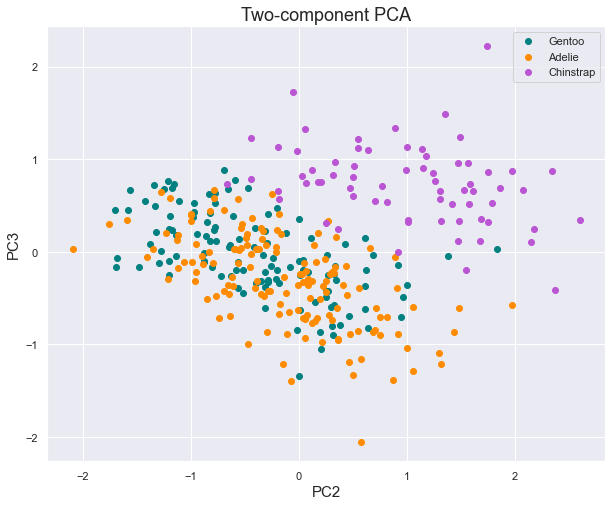

In [15]:
plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df = pca_df[pca_df['species'] == target]
    plt.scatter(temp_df["PC2"],
                temp_df["PC3"],
                c = color)
    
plt.xlabel('PC2', fontsize = 15)
plt.ylabel('PC3', fontsize = 15)
plt.title('Two-component PCA', fontsize = 18)
plt.legend(targets)
plt.show()

This plot isn't great (in terms of classifying) but we can still fairly distinguish between Chinstrap data points versus Adelie or Gentoo.

### PC3 vs. PC4

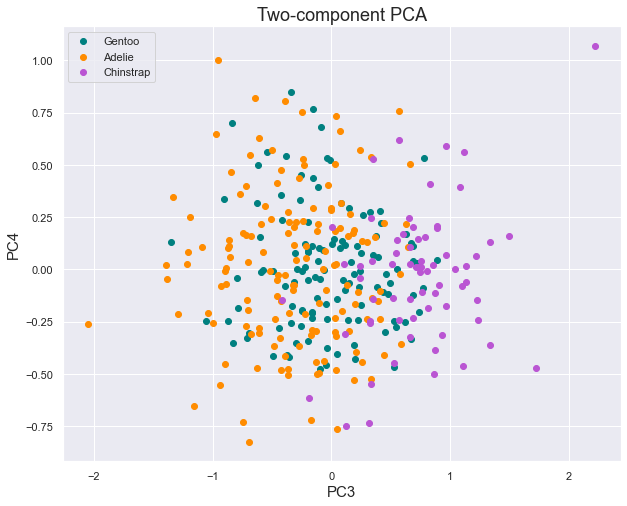

In [16]:
plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df = pca_df[pca_df['species'] == target]
    plt.scatter(temp_df["PC3"],
                temp_df["PC4"],
                c = color)
    
plt.xlabel('PC3', fontsize = 15)
plt.ylabel('PC4', fontsize = 15)
plt.title('Two-component PCA', fontsize = 18)
plt.legend(targets)
plt.show()

This is a plot of the last two (least discernable) component and this plot is very interspersed. Using this for classification would be a nightmare!